In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train = pd.read_csv('fashion-mnist_train.csv', header=0)

In [32]:
X_train = train.drop('label', axis=1).as_matrix()
y_train = train['label'].as_matrix()

In [33]:
print("X_train shape:", X_train.shape, ", y_train shape:", y_train.shape)

X_train shape: (60000, 784) , y_train shape: (60000,)


In [34]:
test = pd.read_csv('fashion-mnist_test.csv', header=0)
X_test = test.drop('label', axis=1).as_matrix()
y_test = test['label'].as_matrix()

In [35]:
print("X_test shape:", X_test.shape, ", y_test shape:", y_test.shape)

X_test shape: (10000, 784) , y_test shape: (10000,)


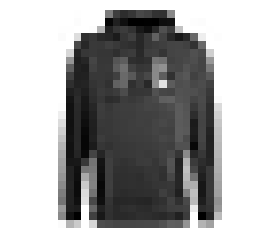

In [54]:
test_image = X_train[5002]
test_digit_image = test_image.reshape(28,28)

plt.imshow(test_digit_image, cmap=matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [55]:
y_train[5002]

2

In [51]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [52]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [57]:
sgd_clf.predict([X_train[5002]])

array([6])

In [59]:
%%time
from sklearn.model_selection import cross_val_score

y_scores_sgd = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

CPU times: user 6.74 s, sys: 498 ms, total: 7.24 s
Wall time: 6.9 s


In [60]:
%%time
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_jobs=-1, random_state=42)
y_scores_forest = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')

CPU times: user 22 s, sys: 544 ms, total: 22.6 s
Wall time: 5.22 s


In [61]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1)
y_scores_knn = cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

CPU times: user 1h 18min 56s, sys: 7.16 s, total: 1h 19min 4s
Wall time: 10min 37s


In [63]:
print("SGD:", y_scores_sgd)
print("Random Forest:", y_scores_forest)
print("KNN:", y_scores_knn)

SGD: [ 0.77445  0.8003   0.8073 ]
Random Forest: [ 0.85425  0.85415  0.8562 ]
KNN: [ 0.8478   0.85445  0.8543 ]


Based on initial accuracy scores, the random forest and k-nearest neighbors classifiers performed better than the stochastic gradient decent classifier. I selected the random forest model as it performed roughly the same as the k-nearest neighbors classifier and ran approximately 250 times faster. 

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[180,200,220,240], 'max_features':[20,30,35]},
              {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
             ]

grid_search = GridSearchCV(forest_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [180, 200, 220, 240], 'max_features': [20, 30, 35]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [68]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.879433333333 {'n_estimators': 180, 'max_features': 20}
0.879866666667 {'n_estimators': 200, 'max_features': 20}
0.879833333333 {'n_estimators': 220, 'max_features': 20}
0.879916666667 {'n_estimators': 240, 'max_features': 20}
0.880616666667 {'n_estimators': 180, 'max_features': 30}
0.880516666667 {'n_estimators': 200, 'max_features': 30}
0.88055 {'n_estimators': 220, 'max_features': 30}
0.880133333333 {'n_estimators': 240, 'max_features': 30}
0.881216666667 {'n_estimators': 180, 'max_features': 35}
0.881633333333 {'n_estimators': 200, 'max_features': 35}
0.881166666667 {'n_estimators': 220, 'max_features': 35}
0.881966666667 {'n_estimators': 240, 'max_features': 35}
0.7626 {'bootstrap': False, 'n_estimators': 3, 'max_features': 2}
0.83255 {'bootstrap': False, 'n_estimators': 10, 'max_features': 2}
0.768916666667 {'bootstrap': False, 'n_estimators': 3, 'max_features': 3}
0.834 {'bootstrap': False, 'n_estimators': 10, 'max_features': 3}
0.783283333333 {'bootstrap': False, 'n_estimators

In [69]:
grid_search.best_score_

0.88196666666666668

In [70]:
grid_search.best_params_

{'max_features': 35, 'n_estimators': 240}

In [ ]:
# For converting numeric labels to text
labels = {0:"T-shirt/top", 
          1:"Trouser", 
          2:"Pullover", 
          3:"Dress", 
          4:"Coat", 
          5:"Sandal", 
          6:"Shirt", 
          7:"Sneaker", 
          8:"Bag", 
          9:"Ankle boot"}

In [103]:
final_model = grid_search.best_estimator_

def label_clothing(indexes):
    """Prints label prediction based on clothing image and correct answer
    based on y_test labels"""
    for x in indexes:
        pred = final_model.predict([X_test[x]])
        correct = y_test[x]
        print("Prediction:", labels[pred[0]], "Correct Answer:", labels[correct])
        #print("prediction:", final_model.predict(X_test[x].reshape(1,-1)), 
        #      "Correct Answer:", y_test[x])

In [105]:
import random

numbers = random.sample(range(0,10000), 10)

label_clothing(numbers)

Prediction: Ankle boot Correct Answer: Ankle boot
Prediction: Dress Correct Answer: Dress
Prediction: Shirt Correct Answer: Dress
Prediction: Sneaker Correct Answer: Sneaker
Prediction: Pullover Correct Answer: Pullover
Prediction: Sneaker Correct Answer: Ankle boot
Prediction: Trouser Correct Answer: Trouser
Prediction: T-shirt/top Correct Answer: T-shirt/top
Prediction: Bag Correct Answer: Bag
Prediction: Coat Correct Answer: Coat


The random forest algorithm is great general purpose algorithm for a number of reasons:
* Requires minimal tuning
* Requires minimal feature preprocessing
* Is capable of feature selection
* Is quicker than similar performing algorithms such as KNN

Though this model performs moderately well (88% accuracy), I will explore other options such as neural networks as a next step to see if I can increase the accuracy. 